## DropSingletonDimensionsView Op

In [1]:
//load ImageJ
%classpath config resolver scijava.public https://maven.scijava.org/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: scijava.public


net.imagej.ImageJ@50987afc

This `Op` wraps the `Views.dropSingletonDimensions()` method of ImgLib2, removing any dimensions of size one from a `RandomAccessibleInterval`. Let's see how the `Op` is called:

In [2]:
ij.op().help('dropSingletonDimensionsView')

Available operations:
	(RandomAccessibleInterval out) =
	net.imagej.ops.transform.dropSingletonDimensionsView.DefaultDropSingletonDimensionsView(
		RandomAccessibleInterval in)

All we need is a `RandomAccessibleInterval` to work on:

[INFO] Populating metadata
[INFO] Populating metadata


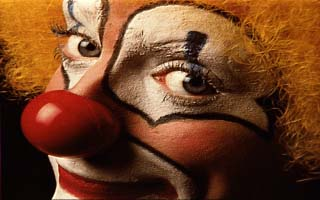

In [3]:
input = ij.scifio().datasetIO().open("http://imagej.net/images/clown.jpg")

ij.notebook().display(input)

Note that a lot of `transform` `Op`s that cut down dimensions give the option to drop the single dimensions. We won't let them do this in this notebook so that we can illustrate the `Op`.

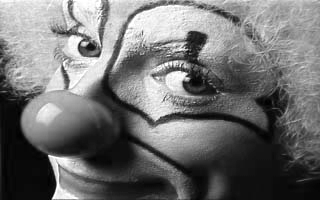

In [4]:
import net.imglib2.FinalInterval

interval = FinalInterval.createMinSize(0, 0, 0, input.dimension(0), input.dimension(1), 1)

//the third argument, false, is for the dropSingleDimensions parameter. We don't want to drop them, hence false.
cropped = ij.op().transform().crop(input, interval, false)

ij.notebook().display(cropped)

Let's take a look at the dimensions of this cropped image:

In [5]:
max = new long[cropped.numDimensions()]

//since the minimum of the image will be at (0, 0), we can find the dimensions by looking at max.
cropped.max(max)

Arrays.toString(max)

[319, 199, 0]

Note the third dimension's maximum is `0`, implying that there is one element in the third dimension. This is really just all that a two dimensional image is, so we can simplify this image by dropping the third dimension:

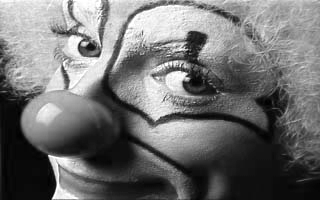

In [6]:
twoDimensional = ij.op().run("dropSingletonDimensionsView", cropped)

ij.notebook().display(twoDimensional)

Looks exactly the same. Let's check the max again:

In [7]:
max = new long[twoDimensional.numDimensions()]

//since the minimum of the image will be at (0, 0), we can find the dimensions by looking at max.
twoDimensional.max(max)

Arrays.toString(max)

[319, 199]

Now the third dimension was dropped, yielding a truly two-dimensional image.